Analysis:

1) As you move along the x-axis, the circle sizes tend to increase. There is a clear trend between the number of rides in a city and the number of drivers. Supply rises to meet the higher demand caused by higher population density and lower car ownership.

2) Another visible trend is fare amount in relation to the city type. Rural areas are much more spread out and will tend to require longer rides. Suburbs follow this trend too with moderate fares and more rides, this also results in the increase in demand for drivers.

3) These trends are also expressed by the series of pie charts. Rural and suburban areas make up a small portion of total drivers, but a more significant portion of the number of total rides and an even larger portion of the total fares as a result.

In [6]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)

city_data_csv = "data/city_data.csv"
ride_data_csv = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_csv)
ride_data = pd.read_csv(ride_data_csv)

# Combine the data into a single dataset

city_ride_data = pd.merge(ride_data, city_data, how="left", on="city")

# Display the data table for preview

city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

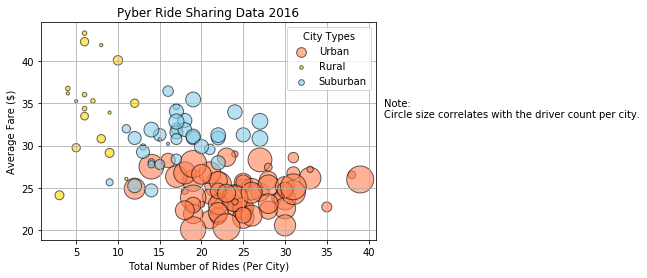

In [2]:
# obtain X(number of rides) and Y(average fare) coordinates for each city type

# urban X and Y coordinates

urban_data = city_ride_data.loc[city_ride_data["type"]=="Urban",:]
urban_city_group = urban_data.groupby("city")

urban_num_rides = urban_city_group["ride_id"].count()
urban_avg_fare = urban_city_group["fare"].mean()

# rural X and Y coordinates

rural_data = city_ride_data.loc[city_ride_data["type"]=="Rural",:]
rural_city_group = rural_data.groupby("city")

rural_num_rides = rural_city_group["ride_id"].count()
rural_avg_fare = rural_city_group["fare"].mean()

# suburban X and Y coordinates

suburb_data = city_ride_data.loc[city_ride_data["type"]=="Suburban",:]
suburb_city_group = suburb_data.groupby("city")

suburb_num_rides = suburb_city_group["ride_id"].count()
suburb_avg_fare = suburb_city_group["fare"].mean()

# Build the scatter plots for each city types

fig, ax = plt.subplots()

urban_plot = ax.scatter(urban_num_rides,urban_avg_fare, marker="o", facecolors="coral", edgecolors="black",
                          s=urban_data["driver_count"]*10, alpha=0.6, label="Urban")

rural_plot = ax.scatter(rural_num_rides,rural_avg_fare, marker="o", facecolors="gold", edgecolors="black",
                          s=rural_data["driver_count"]*10, alpha=0.6, label="Rural")

suburb_plot = ax.scatter(suburb_num_rides,suburb_avg_fare, marker="o", facecolors="SkyBlue", edgecolors="black",
                           s=suburb_data["driver_count"]*10, alpha=0.6, label="Suburban")

# Incorporate the other graph properties

ax.set_title("Pyber Ride Sharing Data 2016")
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid(True)
fig.text(0.92,0.55,"Note:\nCircle size correlates with the driver count per city.")

# Create a legend and incorporate a text label regarding circle size

ax.legend(handles=[urban_plot,rural_plot,suburb_plot], title="City Types", markerscale=0.5,loc="best")

# Save Figure

plt.savefig("Pyber Ride Sharing Data 2016.png",bbox_inches="tight")

# Show plot

plt.show()

## Total Fares by City Type

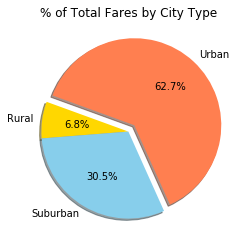

In [3]:
# Calculate Type Percents

city_type_group = city_ride_data.groupby("type")

city_type_fares = city_type_group["fare"].sum()

city_labels = ["Rural","Suburban","Urban"]

colors = ["gold","SkyBlue","coral"]

explode = (0,0,0.1)

# Build Pie Chart

plt.pie(city_type_fares, explode=explode, labels=city_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("Percentage of Total Fares by City Type.png")

# Show Figure

plt.show()

## Total Rides by City Type

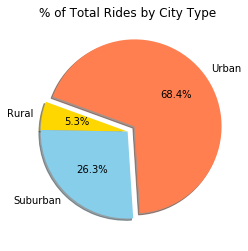

In [4]:
# Calculate Ride Percents

city_type_group = city_ride_data.groupby("type")

city_type_ride_count = city_type_group["ride_id"].count()

city_labels = ["Rural","Suburban","Urban"]

colors = ["gold","SkyBlue","coral"]

explode = (0,0,0.1)

# Build Pie Chart

plt.pie(city_type_ride_count, explode=explode, labels=city_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")

# Save Figure

plt.savefig("Percentage of Total Rides by City Type.png")

# Show Figure

plt.show()

## Total Drivers by City Type

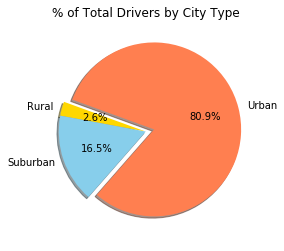

In [5]:
# Calculate Driver Percents

unique_cities = city_ride_data.drop_duplicates(subset='city', keep="last")

city_type_group = unique_cities.groupby("type")

city_type_drivers = city_type_group["driver_count"].sum()

city_labels = ["Rural","Suburban","Urban"]

colors = ["gold","SkyBlue","coral"]

explode = (0,0,0.1)

# Build Pie Chart

plt.pie(city_type_drivers, explode=explode, labels=city_labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("Percentage of Total Drivers by City Type.png")

# Show Figure

plt.show()